#  표시 ⭐ 해논 것들 주의깊게 볼 것..

# 모듈 + 불러오기

In [ ]:
import pandas as pd #판다스
import numpy as np #넘파이
import seaborn as sns #씨본
import re #정규식
import matplotlib
import matplotlib.pyplot as plt #시각화
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# # 참고 : https://blog.naver.com/sisomimoctrl/222793631920

# # 한국어 폰트를 위한 설정 !
# # 한글폰트 파일을 업로드 주피터노트북에 미리 업로드 해놓고 불러오기 

# from matplotlib import font_manager

# # 맑은고딕
# font_fname = 'fonts/malgun.ttf'
# font_family = font_manager.FontProperties(fname = font_fname).get_name()
# plt.rcParams['font.family'] = font_family

In [ ]:
# 최종데이터 불러오기

# # 기초생활수급자
# basic_living = pd.read_csv('최종_기초생활수급자_1821.csv', encoding = 'utf-8')
# basic_living_old_new = pd.read_csv('최종_기초생활수급자_신도심_원도심.csv', encoding = 'utf-8')

# 독거노인
senior_alone = pd.read_csv('/content/최종_독거노인_1821.csv', encoding = 'utf-8')
senior_alone_old_new = pd.read_csv('/content/최종_독거노인_신도심_원도심.csv', encoding = 'utf-8')

# 세대원수
housemate = pd.read_csv('/content/최종_세대원수_동별_1821_수정.csv', encoding = 'utf-8')
housemate_old_new = pd.read_csv('/content/최종_세대원수_신도심_원도심_수정.csv',encoding = 'utf-8')

# 주민등록인구
rereg_pop = pd.read_csv('/content/최종_주민등록인구_연령구분_1821_수정.csv', encoding = 'utf-8')
rereg_pop_old_new = pd.read_csv('/content/최종_주민등록인구_신도시_원도심_수정_final.csv', encoding = 'utf-8')

# 상권정보
business = pd.read_csv('/content/최종_상권정보_변동현황_1821.csv', encoding = 'utf-8')
business_old_new = pd.read_csv('/content/최종_상권정보_신도심_원도심.csv', encoding = 'utf-8')

# 전입전출
move = pd.read_csv('/content/최종_전입전출_1821.csv', encoding = 'utf-8')
move_old_new = pd.read_csv('/content/최종_전입전출_신도심_원도심.csv', encoding = 'utf-8')

# 학교현황
school = pd.read_csv('/content/최종_학교현황_1921.csv', encoding = 'utf-8')
school_old_new = pd.read_csv('/content/최종_학교현황_신도심_원도심.csv', encoding = 'utf-8')

# 건축물대장
building = pd.read_csv('/content/최종_건축물대장_용도_노후건축물_수정.csv', encoding = 'utf-8')

In [ ]:
senior_alone_old_new = pd.read_csv('/content/최종_독거노인_신도심_원도심.csv', encoding = 'utf-8')

In [ ]:
housemate_old_new = pd.read_csv('/content/최종_세대원수_신도심_원도심_수정.csv',encoding = 'utf-8')

In [ ]:
senior_alone_old_new

,base_date,center,tot_cnt,m_cnt,w_cnt
0,2018,원도심,5792,1676,4116
1,2018,신도심,641,188,453
2,2019,원도심,6436,1917,4519
3,2019,신도심,772,229,543
4,2020,원도심,7168,2204,4964
5,2020,신도심,1839,992,847
6,2021,원도심,7743,2413,5330
7,2021,신도심,1158,339,819


In [ ]:
housemate_old_new

,base_date,center,total_hshld,1p_hshld
0,2018,신도심,45995,8838
1,2018,원도심,83811,26862
2,2019,신도심,54829,12385
3,2019,원도심,85871,28173
4,2020,신도심,66092,15923
5,2020,원도심,86174,29775
6,2021,신도심,69540,17496
7,2021,원도심,86444,30918


In [ ]:
x = pd.merge(senior_alone_old_new,housemate_old_new, on = ['base_date', 'center'], how = 'outer' )
x

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld
0,2018,원도심,5792,1676,4116,83811,26862
1,2018,신도심,641,188,453,45995,8838
2,2019,원도심,6436,1917,4519,85871,28173
3,2019,신도심,772,229,543,54829,12385
4,2020,원도심,7168,2204,4964,86174,29775
5,2020,신도심,1839,992,847,66092,15923
6,2021,원도심,7743,2413,5330,86444,30918
7,2021,신도심,1158,339,819,69540,17496


In [ ]:
x['rate'] = (x['tot_cnt'] / x['1p_hshld']) * 100

In [ ]:
x

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld,rate
0,2018,원도심,5792,1676,4116,83811,26862,21.562058
1,2018,신도심,641,188,453,45995,8838,7.252772
2,2019,원도심,6436,1917,4519,85871,28173,22.844567
3,2019,신도심,772,229,543,54829,12385,6.233347
4,2020,원도심,7168,2204,4964,86174,29775,24.073887
5,2020,신도심,1839,992,847,66092,15923,11.549331
6,2021,원도심,7743,2413,5330,86444,30918,25.043664
7,2021,신도심,1158,339,819,69540,17496,6.618656


# 주민등록인구

In [ ]:
rereg_pop.head()

,base_date,emd_nm,total_pop,total_youth_pop,total_adult_pop,total_senior_pop,senior_rate,youth_rate,adult_rate
0,2018,동춘동,57519,12627,36268,8624,14.993307,21.952746,63.053947
1,2018,선학동,18604,2407,12026,4171,22.419910,12.938078,64.642012
2,2018,송도동,136304,37869,86390,12045,8.836865,27.782750,63.380385
3,2018,연수동,63250,10085,41170,11995,18.964427,15.944664,65.090909
4,2018,옥련동,43412,8402,27241,7769,17.895973,19.354096,62.749931


In [ ]:
pop_total_year = rereg_pop.groupby('base_date').sum()
pop_total_year.reset_index(inplace = True)
pop_total_year = pop_total_year[pop_total_year['base_date'] < 2022]
pop_total_year = pop_total_year[['base_date', 'total_pop', 'total_youth_pop', 'total_adult_pop', 'total_senior_pop']]
pop_total_year

,base_date,total_pop,total_youth_pop,total_adult_pop,total_senior_pop
0,2018,346359,75216,220743,50400
1,2019,366550,77809,232385,56356
2,2020,387450,81127,243251,63072
3,2021,389644,80208,241368,68068


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_

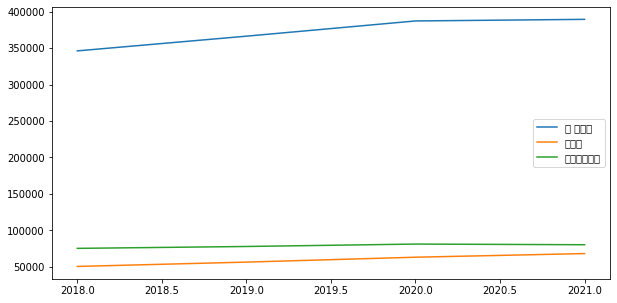

In [ ]:
# 연도별 전체 증감률
# 계속적으로 증가하넹 .. 딱히 볼 건 없겠다 연도별로는 ..

plt.figure(figsize = (10,5))
plt.plot(pop_total_year['base_date'], pop_total_year['total_pop'])
plt.plot(pop_total_year['base_date'], pop_total_year['total_senior_pop'])
plt.plot(pop_total_year['base_date'], pop_total_year['total_youth_pop'])

plt.legend(['총 인구수','노년층', '아동청소년층'])

In [ ]:
# 동별 시각화 ( 연도별 x )
pop_total_dong = rereg_pop.groupby('emd_nm').sum()
pop_total_dong.reset_index(inplace = True)
pop_total_dong.drop(columns = 'base_date', inplace = True)
pop_total_dong = pop_total_dong[['emd_nm', 'total_pop', 'total_youth_pop', 'total_adult_pop', 'total_senior_pop']]
pop_total_dong

,emd_nm,total_pop,total_youth_pop,total_adult_pop,total_senior_pop
0,동춘동,247832,51366,154587,41879
1,선학동,71055,8474,44022,18559
2,송도동,663284,177375,420702,65207
3,연수동,238822,34359,151752,52711
4,옥련동,165702,29724,101979,33999
5,청학동,103308,13062,64705,25541


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

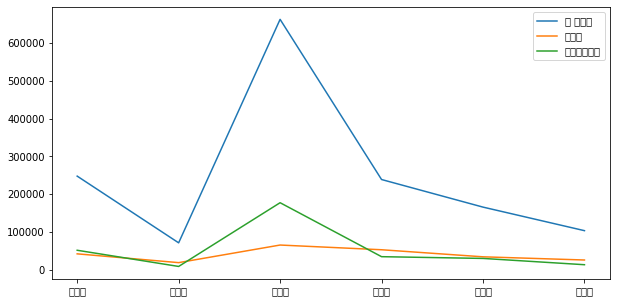

In [ ]:
# 송도의 총 인구수가 엄청나게 많은 것을 볼 수 있음..
# 특히 노년층에 비해 아동청소년층의 비율이 상당함

# 근데 이렇게 보기는 좀 쉽지 않은 듯 ..

plt.figure(figsize = (10,5))
plt.plot(pop_total_dong['emd_nm'], pop_total_dong['total_pop'])
plt.plot(pop_total_dong['emd_nm'], pop_total_dong['total_senior_pop'])
plt.plot(pop_total_dong['emd_nm'], pop_total_dong['total_youth_pop'])

plt.legend(['총 인구수','노년층', '아동청소년층'])

In [ ]:
# 2018~ 2021
rereg_pop_2018 = rereg_pop[rereg_pop['base_date'] == 2018]
rereg_pop_2019 = rereg_pop[rereg_pop['base_date'] == 2019]
rereg_pop_2020 = rereg_pop[rereg_pop['base_date'] == 2020]
rereg_pop_2021 = rereg_pop[rereg_pop['base_date'] == 2021]
rereg_pop_2018 

,base_date,emd_nm,total_pop,total_youth_pop,total_adult_pop,total_senior_pop,senior_rate,youth_rate,adult_rate
0,2018,동춘동,57519,12627,36268,8624,14.993307,21.952746,63.053947
1,2018,선학동,18604,2407,12026,4171,22.419910,12.938078,64.642012
2,2018,송도동,136304,37869,86390,12045,8.836865,27.782750,63.380385
3,2018,연수동,63250,10085,41170,11995,18.964427,15.944664,65.090909
4,2018,옥련동,43412,8402,27241,7769,17.895973,19.354096,62.749931
5,2018,청학동,27270,3826,17648,5796,21.254125,14.030070,64.715805


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_

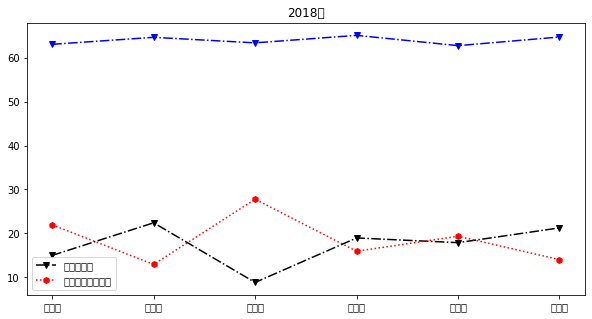

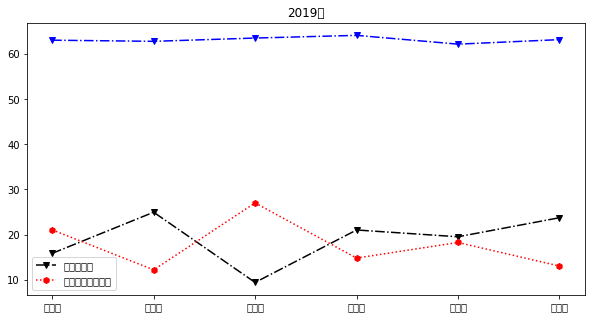

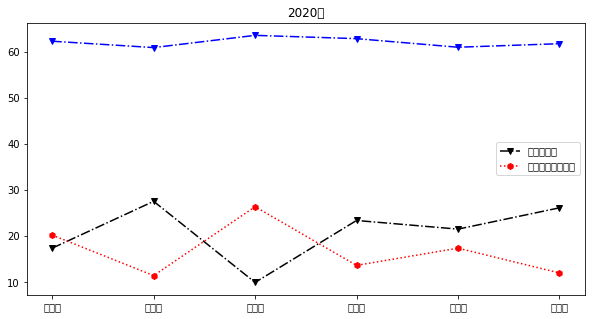

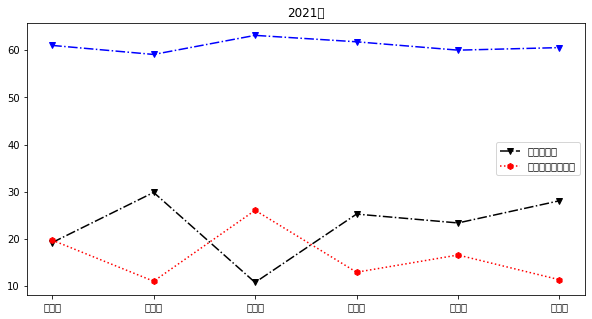

In [ ]:
# 동별 연도에 따른 그래프 변화 >> 모양새가 다 비슷함 ....

plt.figure(figsize = (10,5))
plt.plot(rereg_pop_2018['emd_nm'],rereg_pop_2018['senior_rate'],'k-.v')
plt.plot(rereg_pop_2018['emd_nm'], rereg_pop_2018['youth_rate'],'h:r')
plt.plot(rereg_pop_2018['emd_nm'], rereg_pop_2018['adult_rate'], 'b-.v')
plt.title('2018년')

plt.legend(['노년층비율','아동청소년층비율'])

plt.figure(figsize = (10,5))
plt.plot(rereg_pop_2019['emd_nm'],rereg_pop_2019['senior_rate'],'k-.v')
plt.plot(rereg_pop_2019['emd_nm'], rereg_pop_2019['youth_rate'],'h:r')
plt.plot(rereg_pop_2019['emd_nm'], rereg_pop_2019['adult_rate'], 'b-.v')
plt.title('2019년')

plt.legend(['노년층비율','아동청소년층비율'])

plt.figure(figsize = (10,5))
plt.plot(rereg_pop_2020['emd_nm'],rereg_pop_2020['senior_rate'],'k-.v')
plt.plot(rereg_pop_2020['emd_nm'], rereg_pop_2020['youth_rate'],'h:r')
plt.plot(rereg_pop_2020['emd_nm'], rereg_pop_2020['adult_rate'], 'b-.v')
plt.title('2020년')

plt.legend(['노년층비율','아동청소년층비율'])

plt.figure(figsize = (10,5))
plt.plot(rereg_pop_2021['emd_nm'],rereg_pop_2021['senior_rate'],'k-.v')
plt.plot(rereg_pop_2021['emd_nm'], rereg_pop_2021['youth_rate'],'h:r')
plt.plot(rereg_pop_2021['emd_nm'], rereg_pop_2021['adult_rate'], 'b-.v')
plt.title('2021년')

plt.legend(['노년층비율','아동청소년층비율'])

### ⭐동별 노년층 비율 
- PieChart
- 최종_주민등록인구_연령기준_1821.csv

        - 노년층의 비율을 볼 때, 동별로만 보더라도 송도동의 노년층 비율이 다른 동과 기본적으로 2배가량의 차이가 남을 알 수 있다.
        - 즉, 신도심과 다르게 원도심의 인구 고령화가 진행되고 있음을 보여준다.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=rereg_pop['emd_nm'], values = rereg_pop['senior_rate'], pull=[0, 0, 0.2, 0])])
fig.show()

### 주민등록인구 - 신도심/원도심

In [ ]:
rereg_pop_old_new

,base_date,center,total_pop,total_youth_pop,total_adult_pop,total_senior_pop,senior_rate,youth_rate,adult_rate
0,2018,신도시,136304,37869,86390,12045,8.836865,27.782750,63.380385
1,2018,원도심,210055,37347,134353,38355,18.259503,17.779629,63.960867
2,2019,신도시,155651,42065,98989,14597,9.378032,27.025204,63.596765
3,2019,원도심,210899,35744,133396,41759,19.800473,16.948397,63.251130
4,2020,신도시,182405,48188,116020,18197,9.976152,26.418135,63.605713
5,2020,원도심,205045,32939,127231,44875,21.885440,16.064279,62.050282
6,2021,신도시,188924,49253,119303,20368,10.781055,26.070272,63.148674
7,2021,원도심,200720,30955,122065,47700,23.764448,15.421981,60.813571


In [ ]:
# 신도심과 원도심으로 비교
rereg_pop_old_new

# 신도심
rereg_pop_new = rereg_pop_old_new[rereg_pop_old_new['center'] == '신도심']
rereg_pop_new['base_date'] = rereg_pop_new['base_date'].astype(str)

# 원도심
rereg_pop_old = rereg_pop_old_new[rereg_pop_old_new['center'] == '원도심']
rereg_pop_old['base_date'] = rereg_pop_old['base_date'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, '청장년층비율')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45432 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52789 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50984 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45432 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

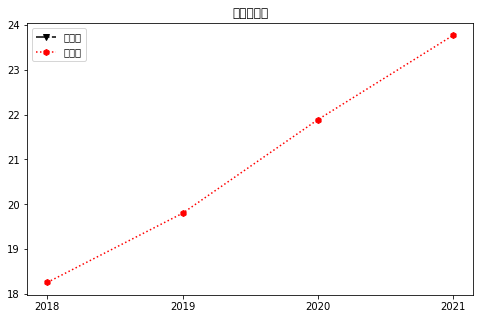

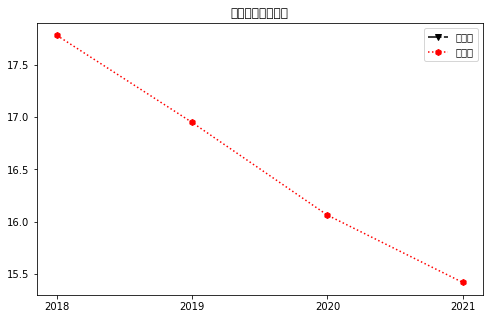

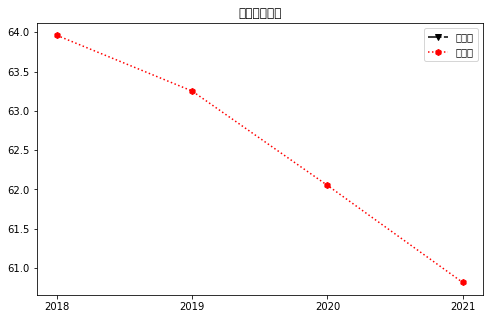

In [ ]:
# 노년층 : 신도심과 원도심 모두 증가하고는 있음
plt.figure(figsize = (8,5))
plt.plot(rereg_pop_new['base_date'],rereg_pop_new['senior_rate'],'k-.v')
plt.plot(rereg_pop_old['base_date'], rereg_pop_old['senior_rate'],'h:r')
plt.legend(['신도심','원도심'])
plt.title('노년층비율')

# 아동청소년층 : 둘 다 감소
plt.figure(figsize = (8,5))
plt.plot(rereg_pop_new['base_date'],rereg_pop_new['youth_rate'],'k-.v')
plt.plot(rereg_pop_old['base_date'], rereg_pop_old['youth_rate'],'h:r')
plt.legend(['신도심','원도심'])
plt.title('아동청소년층비율')

# 청장년층 : 원도심과 신도심의 차이가 상당함 .. 신도심은 계속 비슷한 비율을 유지하는데, 원도심은 눈에 띄게감소
plt.figure(figsize = (8,5))
plt.plot(rereg_pop_new['base_date'],rereg_pop_new['adult_rate'],'k-.v')
plt.plot(rereg_pop_old['base_date'], rereg_pop_old['adult_rate'],'h:r')
plt.legend(['신도심','원도심'])
plt.title('청장년층비율')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50672 missing from current font.



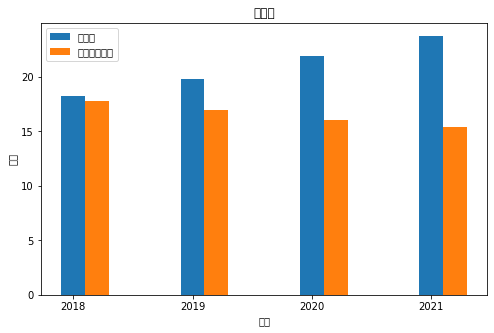

ValueError: ignored

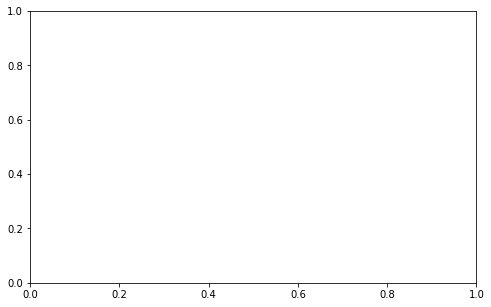

In [ ]:
# 신도심과 원도심으로 비교
rereg_pop_old_new

# 신도심
rereg_pop_new = rereg_pop_old_new[rereg_pop_old_new['center'] == '신도심']
rereg_pop_new['base_date'] = rereg_pop_new['base_date'].astype(str)

# 원도심
rereg_pop_old = rereg_pop_old_new[rereg_pop_old_new['center'] == '원도심']
rereg_pop_old['base_date'] = rereg_pop_old['base_date'].astype(str)


# 원도심 ! : 노년층의 비율은 계속 증가하지만 .. 아동청소년층의 비율은 눈에 띄게 감소
plt.figure(figsize = (8,5))
date = list(rereg_pop_old['base_date'])
index = np.arange(4)
w = 0.2

plt.bar(index, rereg_pop_old['senior_rate'], w, label = '노년층')
plt.bar(index + w, rereg_pop_old['youth_rate'], w, label = '아동청소년층')
#plt.bar(index, rereg_pop_old['adult_rate'], w, label = '청장년층')

plt.title('원도심')
plt.ylabel('비율')
plt.xlabel('연도')

plt.xticks(index, date)

plt.legend()
plt.show()


# 신도심 ! : 노년층의 비율도 증가하기는 하지만 .. 아동청소년층의 비율에 비해 적음을 알 수있음
plt.figure(figsize = (8,5))
date = list(rereg_pop_new['base_date'])
index = np.arange(4)
w = 0.2

plt.bar(index, rereg_pop_new['senior_rate'], w, label = '노년층')
plt.bar(index + w, rereg_pop_new['youth_rate'], w, label = '아동청소년층')
#plt.bar(index, rereg_pop_old['adult_rate'], w, label = '청장년층')

plt.title('신도심')
plt.ylabel('비율')
plt.xlabel('연도')

plt.xticks(index, date)

plt.legend()
plt.show()

### ⭐ 주민등록인구 신도심/원도심 
-  Piechart
- 최종_주민등록인구_신도심_원도심_수정.csv
- 신도심과 원도심의 나이계층별 분류

        - 원도심과 신도심의 청장년층 비율은 비슷하지만, 원도심의 노년층 비율은 신도심의 노년층 비율과 2배 정도 차이가 난다.
        - 또한, 아동청소년층의 경우 신도심이 원도심보다 2배가까이 많은 비율을 차지하는 것을 볼 수 있다.
        - 이를 통해 신도심의 인구는 교육 및 생업을 유지하는 인구의 비율이 높을 것으로 예상할 수 있다.
        - 이는, 아래의 학생수와 비교하여 본다면 .. 초등학교 및 어린이집의 학생수가 신도심에 더 많이 분포하는 이유라고도 말 할 수 있다.
        - 최종적으로 노년층의 비율이 높은 원도심 지역이 신도심에 비해 쇠퇴하고 있음을 보여준다.

In [ ]:
import plotly.graph_objects as go

plt.figure(figsize = (3,3))
fig = go.Figure(data=[go.Pie(labels=rereg_pop_old_new['center'], values = rereg_pop_old_new['senior_rate'])])
fig.show()

plt.figure(figsize = (3,3))
fig = go.Figure(data=[go.Pie(labels=rereg_pop_old_new['center'], values = rereg_pop_old_new['youth_rate'])])
fig.show()

plt.figure(figsize = (3,3))
fig = go.Figure(data=[go.Pie(labels=rereg_pop_old_new['center'], values = rereg_pop_old_new['adult_rate'])])
fig.show()

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

# 학교 현황

In [ ]:
# 송도에만 대학교가 있으므로, 대학교 삭제

school2 = school[school['school_nm'] != '대학교']
school2

,base_date,emd_nm,school_nm,stdnt_num
0,2019,동춘동,고등학교,2340
1,2019,동춘동,어린이집,1735
2,2019,동춘동,유치원,1078
3,2019,동춘동,중학교,2189
4,2019,동춘동,초등학교,4236
...,...,...,...,...
85,2021,청학동,고등학교,858
86,2021,청학동,어린이집,728
87,2021,청학동,유치원,558
88,2021,청학동,중학교,538


In [ ]:
school_year = school2.groupby(['base_date', 'emd_nm']).sum()
school_year.reset_index(inplace = True)
school_year.head()

,base_date,emd_nm,stdnt_num
0,2019,동춘동,11578
1,2019,선학동,1787
2,2019,송도동,27774
3,2019,연수동,8845
4,2019,옥련동,8036


In [ ]:
school_year_2019 = school_year[school_year['base_date'] == 2019]
school_year_2020 = school_year[school_year['base_date'] == 2020]
school_year_2021 = school_year[school_year['base_date'] == 2021]
school_year_2021.head()

,base_date,emd_nm,stdnt_num
12,2021,동춘동,11207
13,2021,선학동,1581
14,2021,송도동,34399
15,2021,연수동,8343
16,2021,옥련동,7571


### ⭐ 연도별 학생수 현황 
- Bargraph or 지도!
- 최종_학교현황_1921.csv
        
        - 송도에만 존재하는 대학교 !
        - 송도(신도심)을 제외하고 나머지 동들의 학생수는 감소추세를 보이고 있다.
        - 원도심의 학교가 신도심으로 이주하거나 폐교하는 등의 사례로 미루어 보아 원도심의 교육인구가 감소하는 것으로 해석할 수 있다.
        - 즉, 신도심은 계속적으로 발전하는 데에 반해 원도심을 쇠퇴하고 있음을 짐작할 수 있다.

In [ ]:
# 연도별 각 동의 학생수 현황

## 송도는 학생수가 계속적으로 증가함 .. 
# 그에 반해 동춘, 선학, 연수, 옥련 등의 원도심은 학생수가 감소하고 있는 것을 볼 수 있음

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '2019', x = school_year_2019['emd_nm'], y = school_year_2019['stdnt_num']),
    go.Bar(name = '2020', x = school_year_2020['emd_nm'], y = school_year_2020['stdnt_num']),
    go.Bar(name = '2021', x = school_year_2021['emd_nm'], y = school_year_2021['stdnt_num'])
])

fig.update_layout(barmode = 'group', title = '연도별 학생수 현황')
fig.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54617 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49373 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54788 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

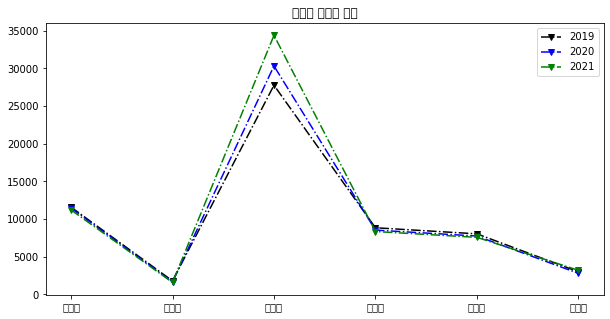

In [ ]:
## 송도만 계속적으로 증가하고 있음을 알 수 있음

plt.figure(figsize = (10,5))

plt.plot(school_year_2019['emd_nm'],school_year_2019['stdnt_num'],'k-.v')
plt.plot(school_year_2020['emd_nm'], school_year_2020['stdnt_num'], 'b-.v')
plt.plot(school_year_2021['emd_nm'], school_year_2021['stdnt_num'], 'g-.v')

plt.title('연도별 학생수 현황')
plt.legend(['2019', '2020', '2021'])

### 도심별 학교에 따른 학생수 현황

In [ ]:
school_old_new2 = school_old_new[school_old_new['school_nm'] != '대학교']

In [ ]:
school_old = school_old_new2[school_old_new2['center'] == '원도심']
school_new = school_old_new2[school_old_new2['center'] == '신도심']

In [ ]:
school_old_2019 = school_old[school_old['base_date'] == 2019]
school_old_2020 = school_old[school_old['base_date'] == 2020]
school_old_2021 = school_old[school_old['base_date'] == 2021]

school_new_2019 = school_new[school_new['base_date'] == 2019]
school_new_2020 = school_new[school_new['base_date'] == 2020]
school_new_2021 = school_new[school_new['base_date'] == 2021]

In [ ]:
school_new_2019

,base_date,center,school_nm,stdnt_num
0,2019,신도심,고등학교,4032
2,2019,신도심,어린이집,3879
3,2019,신도심,유치원,2490
4,2019,신도심,중학교,5287
5,2019,신도심,초등학교,12086


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52488 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46321 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54617 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50976 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

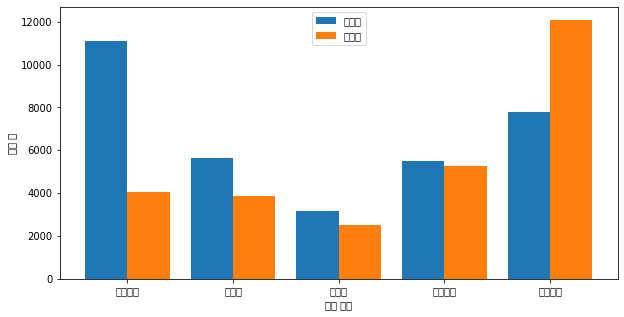

In [ ]:
school_nm = list(school_old_2019['school_nm'])
index = np.arange(5)
w = 0.4

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(index - w/2, school_old_2019['stdnt_num'], w, label = '원도심')
plt.bar(index + w/2, school_new_2019['stdnt_num'], w, label = '신도심')

plt.ylabel('학생 수')
plt.xlabel('학교 분류')

plt.xticks(index, school_nm)

plt.legend()
plt.show()

## 왜인지는 몰겠지만 인덱스 에러가 계속 나는데 .. [고등학교, 어린이집, 유치원, 중학교, 초등학교 ]순서..
# 신도심이 주황색 !!!
# 신도심의 초등학교 수가 정말 많음

### ⭐ 연도별 1인세대수
- 최종_세대원수_동별_1821.csv

        - 연수구 전체 동의 1인 가구수는 계속적으로 증가추세를 보이고 있다.
        - 특히, 송도의 경우 그 증가량이 상당함을 알 수 있다.
        - 아래의 독거노인 가구수와 함께 보면, 송도의 1인가구수의 증가는 독거노인가구의 증가와 상관성이 크지 않음을 짐작할 수 있다.
        - 즉, 원도심의 경우 1인가구수의 증가는 독거노인수의 증가와 밀집하지만 신도심은 아니라는 것이다.
        - 따라서, 노년층의 비율 및 독거노인수와 함께 본다면 원도심의 경우, 1인세대수가 독거노인일 가능성이 높다고 할 수 있다.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '2018', x = senior_housemate_2018['emd_nm'], y = senior_housemate_2018['1p_hshld']),
    go.Bar(name = '2019', x = senior_housemate_2019['emd_nm'], y = senior_housemate_2019['1p_hshld']),
    go.Bar(name = '2020', x = senior_housemate_2020['emd_nm'], y = senior_housemate_2020['1p_hshld']),
    go.Bar(name = '2021', x = senior_housemate_2021['emd_nm'], y = senior_housemate_2021['1p_hshld']),
])

fig.update_layout(barmode = 'group', title = '1인세대수의 변화')

fig.show()

# 독거노인 + 1인세대 : senior_housemate

In [ ]:
senior_alone.head()

,base_date,emd_nm,tot_cnt,m_cnt,w_cnt
0,2018,동춘동,705,181,524
1,2018,선학동,701,225,476
2,2018,송도동,641,188,453
3,2018,연수동,2296,639,1657
4,2018,옥련동,1066,287,779


In [ ]:
housemate.head()

,base_date,emd_nm,total_hshld,1p_hshld
0,2018,동춘동,18764,2746
1,2018,선학동,8140,3144
2,2018,송도동,45995,8838
3,2018,연수동,27971,11326
4,2018,옥련동,16351,4313


In [ ]:
# 독거노인과 세대원수 합치기
senior_housemate = pd.merge(senior_alone, housemate, on = ['base_date', 'emd_nm'], how = 'outer')
senior_housemate.head()

,base_date,emd_nm,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld
0,2018,동춘동,705,181,524,18764,2746
1,2018,선학동,701,225,476,8140,3144
2,2018,송도동,641,188,453,45995,8838
3,2018,연수동,2296,639,1657,27971,11326
4,2018,옥련동,1066,287,779,16351,4313


In [ ]:
senior_housemate.duplicated().sum()

0

In [ ]:
# 1인세대수 대비 독거노인수 비율
senior_housemate['1p_senior_rate'] = (senior_housemate['tot_cnt'] / senior_housemate['1p_hshld']) * 100

In [ ]:
senior_housemate.head()

,base_date,emd_nm,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld,1p_senior_rate
0,2018,동춘동,705,181,524,18764,2746,25.673707
1,2018,선학동,701,225,476,8140,3144,22.296438
2,2018,송도동,641,188,453,45995,8838,7.252772
3,2018,연수동,2296,639,1657,27971,11326,20.271941
4,2018,옥련동,1066,287,779,16351,4313,24.715975


In [ ]:
# 2018
senior_housemate_2018 = senior_housemate[senior_housemate['base_date'] == 2018]

# 2019
senior_housemate_2019 = senior_housemate[senior_housemate['base_date'] == 2019]

# 2020
senior_housemate_2020 = senior_housemate[senior_housemate['base_date'] == 2020]

# 2021
senior_housemate_2021 = senior_housemate[senior_housemate['base_date'] == 2021]

### ⭐ 1인세대수 대비 독거노인 비율 
- Bargraph
- 최종_독거노인_1821.csv
- 최종_세대원수_동별_1821.csv

        - 송도가 원도심보다 1인세대수 대비 독거노인수가 적음을 알 수 있다
        - 원도심은 고령화인구, 독거노인, 기초생활수급자 등의 비율이 신도심에 비해 높다
        - 건축의 노후화등으로 미루어 보아, 원도심의 쇠퇴현상은 신도심과 뚜렷하게 차이를 보임을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46041 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49464 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

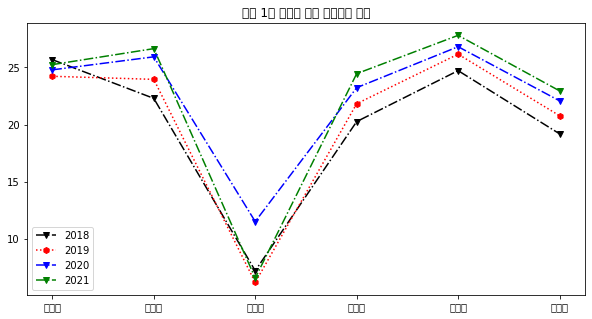

In [ ]:
# 동별 연도에 따른 그래프
# 송도만 비율이 낮은 것을 볼 수 있음

plt.figure(figsize = (10,5))
plt.plot(senior_housemate_2018['emd_nm'],senior_housemate_2018['1p_senior_rate'],'k-.v')
plt.plot(senior_housemate_2019['emd_nm'],senior_housemate_2019['1p_senior_rate'],'h:r')
plt.plot(senior_housemate_2020['emd_nm'], senior_housemate_2020['1p_senior_rate'], 'b-.v')
plt.plot(senior_housemate_2021['emd_nm'], senior_housemate_2021['1p_senior_rate'], 'g-.v')

plt.title('동별 1인 세대수 대비 독거노인 비율')
plt.legend(['2018','2019', '2020', '2021'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48516 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47448 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 49900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48516 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47448 missing from current font.



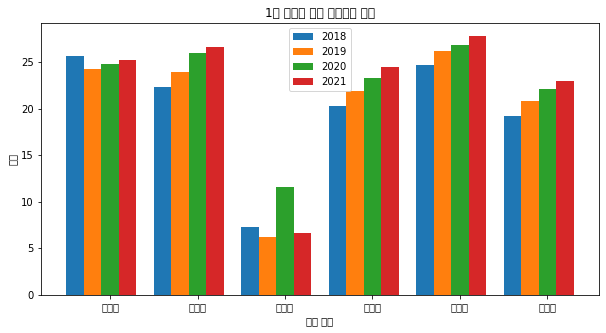

In [ ]:
emd_nm = list(senior_housemate_2018['emd_nm'])
index = np.arange(6)
w = 0.2

fig, ax = plt.subplots(figsize = (10,5))

plt.bar(index - 2*w,senior_housemate_2018['1p_senior_rate'], w, label = '2018')
plt.bar(index - w,senior_housemate_2019['1p_senior_rate'], w, label = '2019')
plt.bar(index, senior_housemate_2020['1p_senior_rate'], w, label = '2020')
plt.bar(index + w, senior_housemate_2021['1p_senior_rate'], w, label = '2021')

plt.ylabel('비율')
plt.xlabel('도심 분류')
plt.title('1인 세대수 대비 독거노인 비율')

plt.xticks(index, emd_nm)

plt.legend()
plt.show()

### 신도심 / 원도심

In [ ]:
# 독거노인과 세대원수 합치기
senior_housemate_old_new = pd.merge(senior_alone_old_new, housemate_old_new, on = ['base_date', 'center'], how = 'outer')
senior_housemate_old_new

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld
0,2018,원도심,5792,1676,4116,83811,26862
1,2018,신도심,641,188,453,45995,8838
2,2019,원도심,6436,1917,4519,85871,28173
3,2019,신도심,772,229,543,54829,12385
4,2020,원도심,7168,2204,4964,86174,29775
5,2020,신도심,1839,992,847,66092,15923
6,2021,원도심,7743,2413,5330,86444,30918
7,2021,신도심,1158,339,819,69540,17496


In [ ]:
# 1인세대수 대비 독거노인수 비율
senior_housemate_old_new['1p_senior_rate'] = (senior_housemate_old_new['tot_cnt'] / senior_housemate_old_new['1p_hshld']) * 100

In [ ]:
senior_housemate_old_new

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld,1p_senior_rate
0,2018,원도심,5792,1676,4116,83811,26862,21.562058
1,2018,신도심,641,188,453,45995,8838,7.252772
2,2019,원도심,6436,1917,4519,85871,28173,22.844567
3,2019,신도심,772,229,543,54829,12385,6.233347
4,2020,원도심,7168,2204,4964,86174,29775,24.073887
5,2020,신도심,1839,992,847,66092,15923,11.549331
6,2021,원도심,7743,2413,5330,86444,30918,25.043664
7,2021,신도심,1158,339,819,69540,17496,6.618656


In [ ]:
senior_housemate_old = senior_housemate_old_new[senior_housemate_old_new['center'] == '원도심']
senior_housemate_new = senior_housemate_old_new[senior_housemate_old_new['center'] == '신도심']
senior_housemate_old

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld,1p_senior_rate
0,2018,원도심,5792,1676,4116,83811,26862,21.562058
2,2019,원도심,6436,1917,4519,85871,28173,22.844567
4,2020,원도심,7168,2204,4964,86174,29775,24.073887
6,2021,원도심,7743,2413,5330,86444,30918,25.043664


In [ ]:
senior_housemate_new

,base_date,center,tot_cnt,m_cnt,w_cnt,total_hshld,1p_hshld,1p_senior_rate
1,2018,신도심,641,188,453,45995,8838,7.252772
3,2019,신도심,772,229,543,54829,12385,6.233347
5,2020,신도심,1839,992,847,66092,15923,11.549331
7,2021,신도심,1158,339,819,69540,17496,6.618656


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50640 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46384 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47480 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49464 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

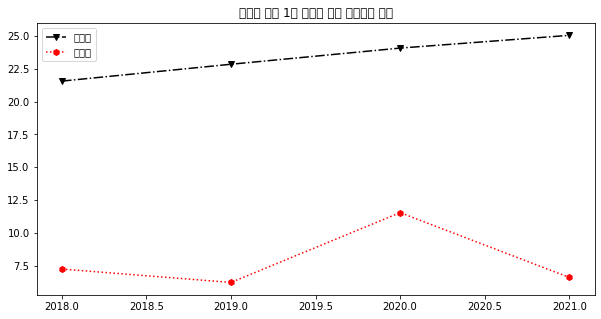

In [ ]:
# 신도심이 2020 년에올라가긴 함! 왜인지 독거노인수가 많았다 ..!
# 그래도 전체적인 증감세를 보이는 원도심과는 달리 신도심은 감소세를 보이고, 그 값의 차이가 큼

plt.figure(figsize = (10,5))
plt.plot(senior_housemate_old['base_date'],senior_housemate_old['1p_senior_rate'],'k-.v')
plt.plot(senior_housemate_new['base_date'],senior_housemate_new['1p_senior_rate'],'h:r')

plt.title('도심에 따른 1인 세대수 대비 독거노인 비율')
plt.legend(['원도심', '신도심'])

### 연수구의 독거노인수 
- 연수구의 독거노인수는 계속적으로 증가하고 있음을 보여줄 수 있음.
- 특히, 원도심/신도심 혹은 동별 1인세대수대비 독거노인 비율 그래프와 함께 
- 그 중에서도 원도심(송도제외)이 계속적인 증가추세를 보인다는 설명을 할 수 있을것.

In [ ]:
senior_alone_total = senior_alone[['base_date', 'emd_nm', 'tot_cnt']]
senior_alone_total = senior_alone_total.groupby('base_date').sum()
senior_alone_total.reset_index(inplace = True)
senior_alone_total

,base_date,tot_cnt
0,2018,6433
1,2019,7208
2,2020,9007
3,2021,8901


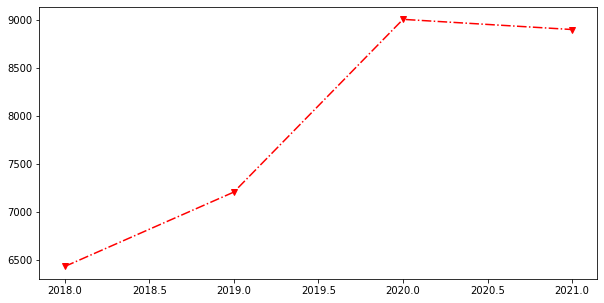

In [ ]:
# 연수구의 독거노인수는 계속적으로 증가추세를 보이고 있음.

plt.figure(figsize = (10,5))
plt.plot(senior_alone_total['base_date'], senior_alone_total['tot_cnt'],'r-.v')

### ⭐ 독거노인수: 연수구전체 + 신/원도심 
- Linegraph 
- 최종_독거노인_신도심_원도심.csv
- 최종_세대원수_신도심_원도심.csv

        - 연수구 전체의 독거노인수가 증가 하고 있고 특히, 원도심에서의 그 증가 추세가 뚜렷하다는 것을 볼 수 있다.
        - 또한, 신도심의 독거노인 수는 계속적으로 변동하고 감소하기도 한다.
        - 즉, 신도심과는 다르게 원도심에 독거노인이 집중적으로 분포하고 있다는 것을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50640 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46384 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47480 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49464 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

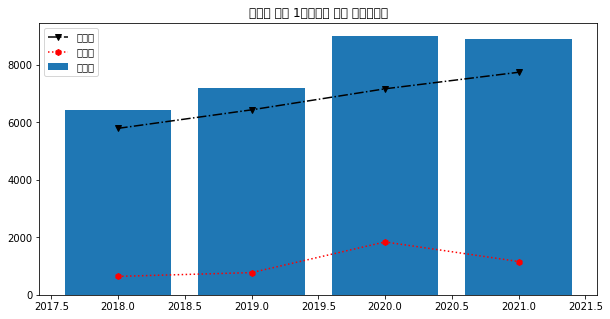

In [ ]:
# 연수구 전체 독거노인수와 비교!
# 전체적으로 독거노인수는 증가하고 있다 .. 그 중에서도 특히 원도심의 증가세가 뚜렷하다.

plt.figure(figsize = (10,5))
plt.plot(senior_housemate_old['base_date'],senior_housemate_old['tot_cnt'],'k-.v')
plt.plot(senior_housemate_new['base_date'],senior_housemate_new['tot_cnt'],'h:r')
plt.bar(senior_alone_total['base_date'], senior_alone_total['tot_cnt'])

plt.title('도심에 따른 1인세대수 대비 독거노인수')
plt.legend(['원도심', '신도심', '연수구'])

# 기초생활수급자

In [ ]:
# basic_living_2018 = basic_living[basic_living['base_date'] == 2018]
# basic_living_2019 = basic_living[basic_living['base_date'] == 2019]
# basic_living_2020 = basic_living[basic_living['base_date'] == 2020]
# basic_living_2021 = basic_living[basic_living['base_date'] == 2021]
# basic_living_2018

In [ ]:
# # 선학동을 제외하고 모든 동이 매년 증가추세를 보이고 있음
# # 특히, 동별로만 보아도 원도심과 신도심의 기초생활수급대상자 수는 차이가 큼
# # 송도를 제외하고 대부분의 동이 기본 1000명을 넘음 ( 동춘동은 300~ )

# emd_nm = list(basic_living_2018['emd_nm'])
# index = np.arange(6)
# w = 0.2

# fig, ax = plt.subplots(figsize = (10,5))

# plt.bar(index - 2*w,basic_living_2018['total_pop'], w, label = '2018')
# plt.bar(index - w,basic_living_2019['total_pop'], w, label = '2019')
# plt.bar(index, basic_living_2020['total_pop'], w, label = '2020')
# plt.bar(index + w, basic_living_2021['total_pop'], w, label = '2021')

# plt.ylabel('기초생활수급자 수')
# plt.xlabel('도심 분류')
# plt.title('동별 기초생활수급자 현황')

# plt.xticks(index, emd_nm)

# plt.legend()
# plt.show()

### ⭐천명당기초생활수급자수 
- Bargraph or 지도
- 최종_기초생활수급자_1821.csv
- 최종_주민등록인구_연령구분_1821.csv
- (총 기초생활수급자 수 /총 인구수) * 1000

        - 인구 천명당 기초생활수급자비율을 볼 때, 송도와 동춘을 제외한 원도심에 기초생활수급자가 많이 분포하고 있음을 알 수 있다.
        - 이를 신도심과 원도심으로 비교해본다면 신도심의 주민들이 원도심의 주민들의 생계수준에 비해 높다는 것을 보여준다고 할 수 있다.

In [ ]:
# # 컬럼이름이 같으므로 수정
# basic_living.head()
# basic_living2 = basic_living.copy()
# basic_living2 = basic_living2.rename(columns = {'total_pop' : 'total_basic_pop'})
# basic_living2.head()

In [ ]:
# rereg_pop_total = rereg_pop[['base_date', 'emd_nm', 'total_pop']]

In [ ]:
# rereg_basic_living = pd.merge(basic_living2, rereg_pop_total, on = ['base_date', 'emd_nm'], how = 'outer')
# rereg_basic_living.head()

In [ ]:
# # 1000명당 기초생활 수급자 비율
# # (총 기초생활수급자 수 /총 인구수) * 1000
# rereg_basic_living['1000pop_basic_num'] = (rereg_basic_living['total_basic_pop'] / rereg_basic_living['total_pop']) * 1000

In [ ]:
# rereg_basic_living.head()

In [ ]:
# rereg_basic_living_2018 = rereg_basic_living[rereg_basic_living['base_date'] == 2018]
# rereg_basic_living_2019 = rereg_basic_living[rereg_basic_living['base_date'] == 2019]
# rereg_basic_living_2020 = rereg_basic_living[rereg_basic_living['base_date'] == 2020]
# rereg_basic_living_2021 = rereg_basic_living[rereg_basic_living['base_date'] == 2021]
# rereg_basic_living_2018

In [ ]:
# # 이렇게 보니 차이가 더 명확함 ... 신도심에는 0.1에 가까울 정도의 비율로 존재

# emd_nm = list(rereg_basic_living_2018['emd_nm'])
# index = np.arange(6)
# w = 0.2

# fig, ax = plt.subplots(figsize = (10,5))

# plt.bar(index - 2*w,rereg_basic_living_2018['1000pop_basic_num'], w, label = '2018')
# plt.bar(index - w,rereg_basic_living_2019['1000pop_basic_num'], w, label = '2019')
# plt.bar(index, rereg_basic_living_2020['1000pop_basic_num'], w, label = '2020')
# plt.bar(index + w, rereg_basic_living_2021['1000pop_basic_num'], w, label = '2021')

# plt.ylabel('천명당 기초생활수급자 수')
# plt.xlabel('동이름')
# plt.title('동별 천명당 기초생활수급자수 현황')

# plt.xticks(index, emd_nm)

# plt.legend()
# plt.show()

# 전입 / 전출

In [ ]:
move.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270


In [ ]:
# 동별 df

Move_dongchun = move[move['emd_nm'] == '동춘동']                 
Move_seonhak = move[move['emd_nm'] == '선학동']
Move_songdo = move[move['emd_nm'] == '송도동']
Move_yeonsu = move[move['emd_nm'] == '연수동']
Move_ongnyeon = move[move['emd_nm'] == '옥련동']
Move_chunghak = move[move['emd_nm'] == '청학동']

Move_dongchun

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
6,2019,동춘동,7965,5771,16806,5304,3743,9909
12,2020,동춘동,5443,3254,10446,6204,4534,11726
18,2021,동춘동,4512,2657,7933,5437,3945,9039


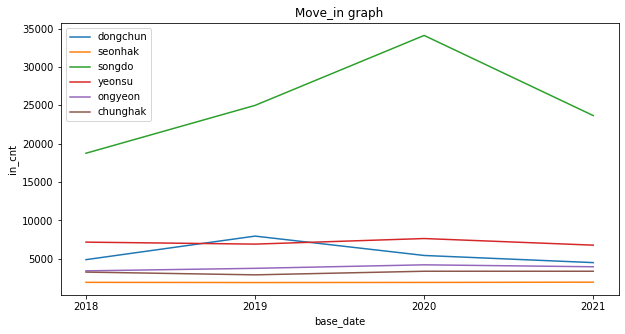

In [ ]:
# 연도별 각 동의 전입건수 graph

plt.figure(figsize = (10,5))
plt.plot(Move_dongchun['base_date'], Move_dongchun['in_cnt'])
plt.plot(Move_seonhak['base_date'], Move_seonhak['in_cnt'])
plt.plot(Move_songdo['base_date'], Move_songdo['in_cnt'])
plt.plot(Move_yeonsu['base_date'], Move_yeonsu['in_cnt'])
plt.plot(Move_ongnyeon['base_date'], Move_ongnyeon['in_cnt'])
plt.plot(Move_chunghak['base_date'], Move_chunghak['in_cnt'])
plt.xlabel('base_date')
plt.ylabel('in_cnt')
plt.xticks(Move_songdo['base_date'])
plt.title("Move_in graph")
plt.legend(['dongchun', 'seonhak', 'songdo', 'yeonsu', 'ongyeon', 'chunghak'])

In [ ]:
move_2018 = move[move['base_date'] == 2018]
move_2019 = move[move['base_date'] == 2019]
move_2020 = move[move['base_date'] == 2020]
move_2021 = move[move['base_date'] == 2021]
move_2018

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270
5,2018,청학동,3277,2437,4893,3776,2815,6161


### 연도별 동에 따른 전입/전출 현황 
- Bargraph
- 어떤식으로 시각화할지 .. 아직 미정 !!
- 최종_전입전출_1821.csv

      - 송도의 경우, 원도심보다 전입/전출 건수가 훨씬 많음을 알 수 있다.
      - 이는 유동인구가 많다는 것을 의미하고 앞선 아동청소년층/청장년층의 비율로 볼때, 학령인구 및 직장인구들의 이동으로 보인다.
      - 계속적으로 증가 추세를 보이는 송도의 전입현황과는 반대로, 원도심에서는 변화가 거의 없거나 감소하고 있다.
      - 또한, 전출현황에서 보면 원도심의 경우에도 증가하고 있는 것을 볼 수 있다.
      - 종합적으로, 전입/전출 모두 많은 신도심에 비해 전입대비 전출건수가 많은 원도심을 통해 계속적으로 쇠퇴하고 있음을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46041 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51077 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54788 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54889 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52632 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

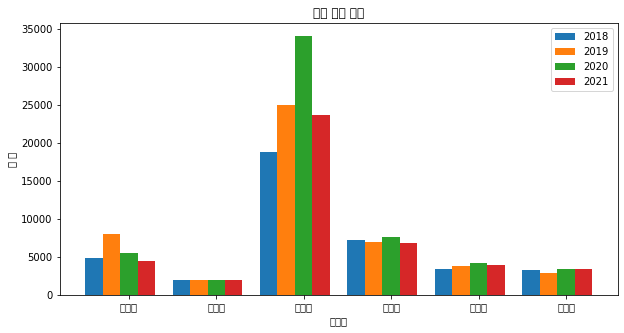

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52636 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 52636 missing from current font.



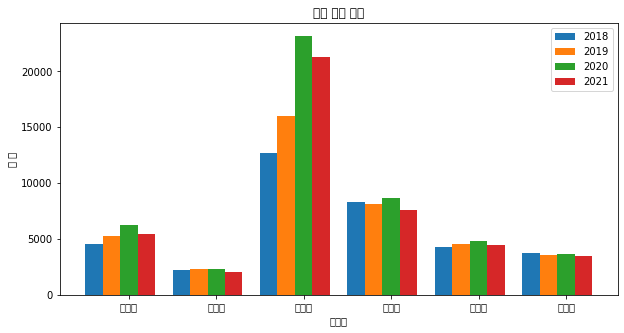

In [ ]:
# 전입 현황 .. 
# 송도가 원도심에 비해 훨씬 많은 전입건수가 있음을 볼 수 잇음

emd_nm = list(move_2018['emd_nm'])
index = np.arange(6)
w = 0.2

fig, ax = plt.subplots(figsize = (10,5))

plt.bar(index - 2*w,move_2018['in_cnt'], w, label = '2018')
plt.bar(index - w,move_2019['in_cnt'], w, label = '2019')
plt.bar(index, move_2020['in_cnt'], w, label = '2020')
plt.bar(index + w, move_2021['in_cnt'], w, label = '2021')

plt.ylabel('건 수')
plt.xlabel('동이름')
plt.title('동별 전입 현황')

plt.xticks(index, emd_nm)

plt.legend()
plt.show()

# 전출 현황 .. 
# 송도가 원도심에 비해 훨씬 많은 전출건수가 있음을 볼 수 잇음

emd_nm = list(move_2018['emd_nm'])
index = np.arange(6)
w = 0.2

fig, ax = plt.subplots(figsize = (10,5))

plt.bar(index - 2*w,move_2018['out_cnt'], w, label = '2018')
plt.bar(index - w,move_2019['out_cnt'], w, label = '2019')
plt.bar(index, move_2020['out_cnt'], w, label = '2020')
plt.bar(index + w, move_2021['out_cnt'], w, label = '2021')

plt.ylabel('건 수')
plt.xlabel('동이름')
plt.title('동별 전출 현황')

plt.xticks(index, emd_nm)

plt.legend()
plt.show()

## 최종적으로 볼때, 송도는 전입도 전출도 많다

### 신도심/원도심 전입전출

In [ ]:
move_old = move_old_new[move_old_new['center'] == '원도심']
move_new = move_old_new[move_old_new['center'] == '신도심']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50640 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46384 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47480 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51077 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

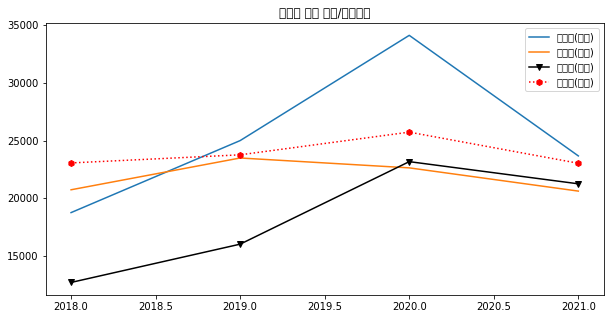

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(move_old['base_date'], move_old['in_cnt'])
plt.plot(move_new['base_date'],move_new['in_cnt'])
plt.plot(move_old['base_date'], move_old['out_cnt'],'k-v')
plt.plot(move_new['base_date'],move_new['out_cnt'],'h:r')

plt.title('도심에 따른 전입/전출현황')
plt.legend(['원도심(전입)', '신도심(전입)', '원도심(전출)', '신도심(전출)' ])

In [ ]:
move.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270


In [ ]:
# 이동건수 : 전입 - 전출
move2 = move.copy()
move2['total_cnt'] = (move2['in_cnt'] - move2['out_cnt'])
move2.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num,total_cnt
0,2018,동춘동,4898,3205,10375,4523,3287,8845,375
1,2018,선학동,1943,1347,2862,2225,1608,3427,-282
2,2018,송도동,18760,14490,39676,12713,9472,25306,6047
3,2018,연수동,7180,5213,10620,8285,5986,13277,-1105
4,2018,옥련동,3438,2247,5791,4251,3055,7270,-813


In [ ]:
move2_2018 = move2[move2['base_date'] == 2018]
move2_2019 = move2[move2['base_date'] == 2019]
move2_2020 = move2[move2['base_date'] == 2020]
move2_2021 = move2[move2['base_date'] == 2021]
move2_2018

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num,total_cnt
0,2018,동춘동,4898,3205,10375,4523,3287,8845,375
1,2018,선학동,1943,1347,2862,2225,1608,3427,-282
2,2018,송도동,18760,14490,39676,12713,9472,25306,6047
3,2018,연수동,7180,5213,10620,8285,5986,13277,-1105
4,2018,옥련동,3438,2247,5791,4251,3055,7270,-813
5,2018,청학동,3277,2437,4893,3776,2815,6161,-499


# 건축물대장

In [ ]:
building

,etc_purpose_nm,emd_nm,old_cnt,purpose_cnt
0,교육 및 사회용,동춘동,72,112
1,교육 및 사회용,선학동,23,38
2,교육 및 사회용,송도동,0,346
3,교육 및 사회용,연수동,51,79
4,교육 및 사회용,옥련동,76,109
5,교육 및 사회용,청학동,27,53
6,상업용,동춘동,187,326
7,상업용,선학동,79,133
8,상업용,송도동,0,299
9,상업용,연수동,184,245


In [ ]:
# 주거용 건물
building_living = building[building['etc_purpose_nm'] == '주거용']

# 교육 및 사회용
building_edu = building[building['etc_purpose_nm'] == '교육 및 사회용']

# 상업용
building_com = building[building['etc_purpose_nm'] == '상업용']

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '주거용', x = building_edu['emd_nm'], y = building_living['purpose_cnt']),
    go.Bar(name = '교육 및 사회용', x = building_com['emd_nm'], y = building_edu['purpose_cnt']),
    go.Bar(name = '상업용', x = building_living['emd_nm'], y = building_com['purpose_cnt'])
])

fig.update_layout(barmode = 'group', title = '동별 건축물 용도 현황')
fig.show()

### ⭐ 주거용 및 노후건축물 현황 
- Bargraph or 지도
- 최종_건축물대장_용도_노후건축물_수정.csv

        - 노후건축물 : 20년이상
        - 송도는 노후 건축물이  없음을 보여주는 자료로 사용 !
        - 2007년이후의 신도심 특성상, 노후건축물이 없고 최근 계속적인 개발로 인해 신축건축물의 비율이 늘어나고 있는 중이다.
        - 원도심의 경우, 송도와 달리 20년 이상의 노후건축물수가 상당히 많은것을 볼 수 있다.
        - 또한, 노후 건축물이 많으면서 주거용 건축물도 많은 것으로 보아 주거용 건축물 대부분이 노후건축물일 가능성이 높다
        - 건축물의 노후화로 인해 도시의 미관을 해치거나 주민들이 거주함에 있어 불편함이 존재할 가능성이 있다
        - 즉, 계속적인 신도심의 개발로 인해 원도심과 신도심의 건축물사이의 차이는 계속적으로 증가할 것으로 보인다.

In [ ]:
old_building = building[['emd_nm', 'old_cnt']]
old_building .head()

,emd_nm,old_cnt
0,동춘동,72
1,선학동,23
2,송도동,0
3,연수동,51
4,옥련동,76


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(x = old_building ['emd_nm'], y = old_building ['old_cnt']),
])

fig.update_layout(barmode = 'group', title = '동별 노후 건축물 현황')
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '노후건축물수', x = building_living ['emd_nm'], y = building_living ['old_cnt']),
    go.Bar(name = '주거용건축물',x = building_living ['emd_nm'], y = building_living ['purpose_cnt'])
])

fig.update_layout(barmode = 'group', title = '주거용 건축물 및 노후 건축물 수 현황')
fig.show()


# 상권정보

In [ ]:
business.head()

,emd_nm,store_type,open_cnt,close_cnt
0,동춘동,건강,34,23
1,동춘동,문화,11,19
2,동춘동,생활,642,172
3,동춘동,식품,1044,957
4,선학동,건강,13,9


In [ ]:
business_health = business[business['store_type'] == '건강']
business_culture = business[business['store_type'] == '문화']
business_life = business[business['store_type'] == '생활']
business_food = business[business['store_type'] == '식품']

In [ ]:
# 전체적으로 볼때, 송도가 주민들이 살아가는데에 필요한 건강, 생활, 식품 등의 상권수가 훨씬 많다.

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '건강', x = business_life['emd_nm'], y = business_life['open_cnt']),
    #go.Bar(name = '문화', x = business_culture['emd_nm'], y = business_culture['open_cnt']),
    go.Bar(name = '생활', x = business_life['emd_nm'], y = business_life['open_cnt']),
    go.Bar(name = '식품', x = business_food['emd_nm'], y = business_food['open_cnt']),   
])

fig.update_layout(barmode = 'group', title = '유형별 상권 현황')
fig.show()

### ⭐ 인구율에 따른 동별 상권현황
- 최종_상권정보_변동현황.csv
- 최종_주민등록인구_연령구분_1821.csv
- 기준연도 : 2021

        - 전체적으로 볼때, 송도가 주민들이 질 좋게 살아가는데에 중요한 건강, 생활, 식품 등의 상권수가 훨씬 많다.
        - 연수구 전체 인구대비, 동별로 인구비율이 높은 만큼 .. 상권이 발달하고 있음을 볼 수 있다

In [ ]:
rereg_pop3 =rereg_pop[rereg_pop['base_date'] == 2021]
rereg_pop3 = rereg_pop3[['emd_nm', 'total_pop']]
rereg_pop_dong = rereg_pop3.groupby('emd_nm').sum()
rereg_pop_dong.reset_index(inplace = True)
rereg_pop_dong 

,emd_nm,total_pop
0,동춘동,62348
1,선학동,17176
2,송도동,188924
3,연수동,56684
4,옥련동,39697
5,청학동,24815


In [ ]:
# 연수구 전체 인구 수 중, 해당 동의 인구수 비율
rereg_pop_dong['pop_rate'] = (rereg_pop_dong['total_pop'] / rereg_pop_dong['total_pop'].sum()) * 100

In [ ]:
rereg_pop_dong

,emd_nm,total_pop,pop_rate
0,동춘동,62348,16.001273
1,선학동,17176,4.408126
2,송도동,188924,48.486311
3,연수동,56684,14.547638
4,옥련동,39697,10.188018
5,청학동,24815,6.368634


In [ ]:
pop_business_health = pd.merge(rereg_pop_dong ,business_health, on = 'emd_nm', how = 'outer')
pop_business_life = pd.merge(rereg_pop_dong ,business_life, on = 'emd_nm', how = 'outer' )
pop_business_culture = pd.merge(rereg_pop_dong ,business_culture, on = 'emd_nm', how = 'outer' )
pop_business_food = pd.merge(rereg_pop_dong ,business_food, on = 'emd_nm', how = 'outer' )

In [ ]:
pop_business_health

,emd_nm,total_pop,pop_rate,store_type,open_cnt,close_cnt
0,동춘동,62348,16.001273,건강,34,23
1,선학동,17176,4.408126,건강,13,9
2,송도동,188924,48.486311,건강,213,80
3,연수동,56684,14.547638,건강,30,34
4,옥련동,39697,10.188018,건강,21,16
5,청학동,24815,6.368634,건강,11,13


In [ ]:
# 전체적으로 볼때, 송도가 주민들이 살아가는데에 필요한 건강, 생활, 식품 등의 상권수가 훨씬 많다.
# 연수구 전체 인구대비, 동별로 인구비율이 높은 만큼 .. 상권이 발달하고 있음을 볼 수 있다

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name = '건강', x = business_life['emd_nm'], y = business_life['open_cnt']),
    #go.Bar(name = '문화', x = business_culture['emd_nm'], y = business_culture['open_cnt']),
    go.Bar(name = '생활', x = business_life['emd_nm'], y = business_life['open_cnt']),
    go.Bar(name = '식품', x = business_food['emd_nm'], y = business_food['open_cnt']),
    # 값과 맞춰서 보기위해 ..
    go.Line(name = '연수구 전체 대비 인구율',x = rereg_pop_dong['emd_nm'], y = rereg_pop_dong['pop_rate'] * 100) ,
])

fig.update_layout(barmode = 'group', title = '인구율에 따른 동별 상권현황')

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


